Set Cover problem

In [ ]:
from random import random, seed
from itertools import product
import numpy as np
from matplotlib import pyplot as plt
from icecream import ic
from tqdm import tqdm

In [10]:
#Helper Functions
def valid(solution):
    """Checks wether solution is valid (ie. covers all universe)"""
    
    return np.all(np.logical_or.reduce(SETS[solution]))
def fitness(solution: np.array) -> tuple:
    """Returns a tuple (validity, negative cost) to maximize validity and minimize cost."""
    return (valid(solution), -cost(solution))

def cost(solution):
    """Returns the cost of a solution (to be minimized)"""
    return COSTS[solution].sum()

In [8]:
universes = [100, 1000, 10_000, 100_000, 100_000, 100_000]
num_sets =[10, 100, 1000, 10_000, 10_000, 10_000]
densities= [0.2, 0.2, 0.2, 0.1, 0.2, 0.3]

In [39]:
def simulated_annealing(set_data, cost_values, num_elements, density, rng, start_temp=900.0, decay_rate=0.995, end_temp=1e-6, max_steps=200):
    
    if num_elements < 1000:
        current_state = rng.random(num_elements) < 1
    else:
        current_state = rng.random(num_elements) < 0.5

    # Evaluate the initial solution
    current_score = fitness(current_state)
    optimal_state = current_state
    optimal_score = current_score

    # Set initial temperature and track history
    temp = start_temp
    fitness_history = [current_score[1]]
    c=0
    d=0
    # Begin simulated annealing loop
    for step in tqdm(range(max_steps), desc="Simulated Annealing"):
       # print("step \n")
        c+=1
        # Copy the current solution and alter it by flipping one element
        candidate_state = current_state.copy()
        flip_index = np.random.randint(num_elements)
        candidate_state[flip_index] = not candidate_state[flip_index]  

        candidate_score = fitness(candidate_state)

        # Check if the new solution is valid before proceeding
        if not valid(candidate_state):
            d+=1
            continue
        
        # Calculate the acceptance probability and decide whether to accept the new state
        score_diff = current_score[1] - candidate_score[1]
        acceptance_prob = np.exp(-score_diff / temp)
        
        if candidate_score > current_score or random() < acceptance_prob:
            current_state = candidate_state
            current_score = candidate_score

            # Update the best solution if this one is better
            if current_score > optimal_score:
                optimal_state = current_state
                optimal_score = current_score
        
        # Gradually decrease the temperature
        temp = max(temp * decay_rate, end_temp)

        # Track the progress of the optimization
        fitness_history.append(current_score[1])

        # Stop if the temperature has cooled down to the minimum
        if temp <= end_temp:
            break

        ic(step, optimal_score, temp)
    print(fitness_history)
    print(d)
    return optimal_state, optimal_score, fitness_history

Universe Size: 100, Num Sets: 10, Density: 0.2


Simulated Annealing: 100%|██████████| 200/200 [00:10<00:00, 18.40it/s]


[-284.0379659491181, -257.0523089956468, -284.0379659491181, -257.0523089956468, -284.0379659491181, -257.0523089956468, -284.0379659491181, -257.0523089956468, -284.0379659491181, -257.0523089956468, -284.0379659491181, -257.0523089956468, -284.0379659491181, -257.0523089956468, -284.0379659491181, -257.0523089956468, -284.0379659491181, -257.0523089956468, -284.0379659491181, -257.0523089956468, -284.0379659491181, -257.0523089956468]
179
Best cost for: 100: (True, -257.0523089956468)
Best validity solution: [ True  True  True  True  True False  True  True  True  True]


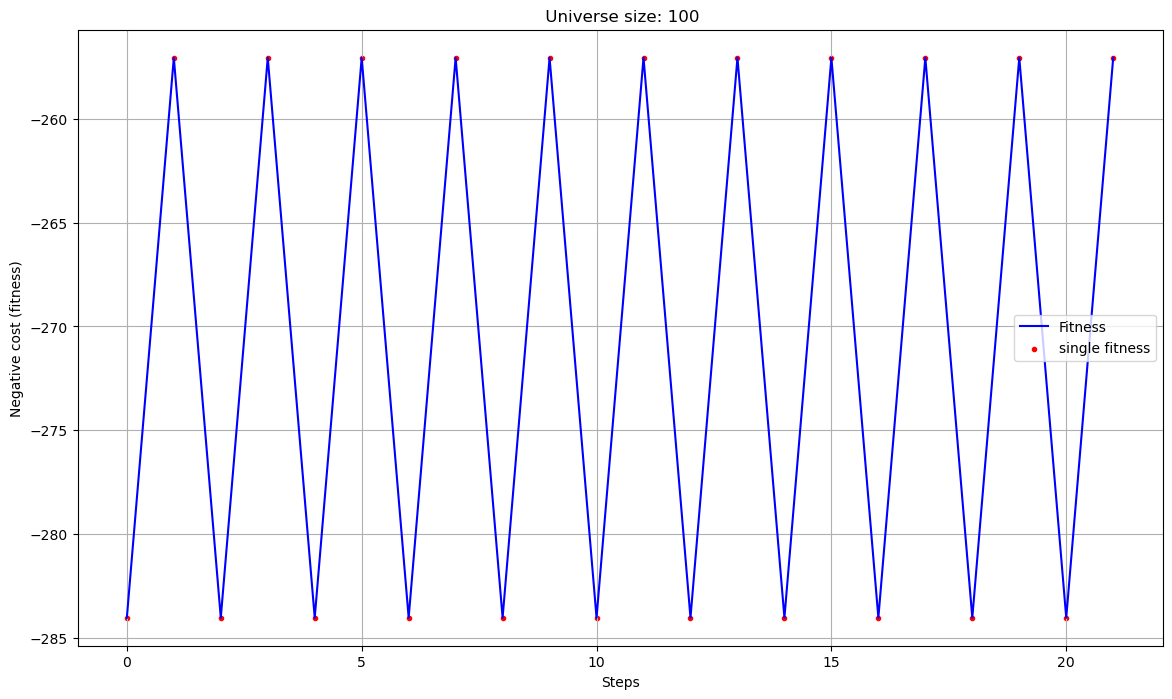

Universe Size: 1000, Num Sets: 100, Density: 0.2


Simulated Annealing: 100%|██████████| 200/200 [02:06<00:00,  1.58it/s]


[-34399.36910141707, -34046.53757787237, -33738.43438516251, -33374.33699680641, -33017.75376669236, -32638.585921000362, -32348.95113985284, -32026.000087559627, -31673.168564014926, -31297.773527278507, -30912.940071986042, -30552.601543382374, -30216.60739853429, -29863.775874989602, -29501.558359773033, -29165.56421492495, -28829.57007007687, -28474.863144175404, -28110.7657558193, -27757.934232274598, -27421.940087426512, -27113.836894716664, -26762.87986775271, -27142.047713444706, -26802.318420517862, -26441.97989191419, -26094.769124921633, -25736.308692623716, -25377.848260325794, -25713.842405173877, -26072.302837471794, -25753.06968651445, -25435.694013968154, -25792.277244082205, -25399.877846745876, -25043.29461663182, -24712.896112424136, -24412.192715568355, -24412.192715568355, -24044.332936307175, -23708.338791459097, -23708.338791459097, -23372.344646611014, -23010.127131394445, -22664.788119769342, -22328.79397492126, -22022.54226177677, -21671.585234812825, -22028.1

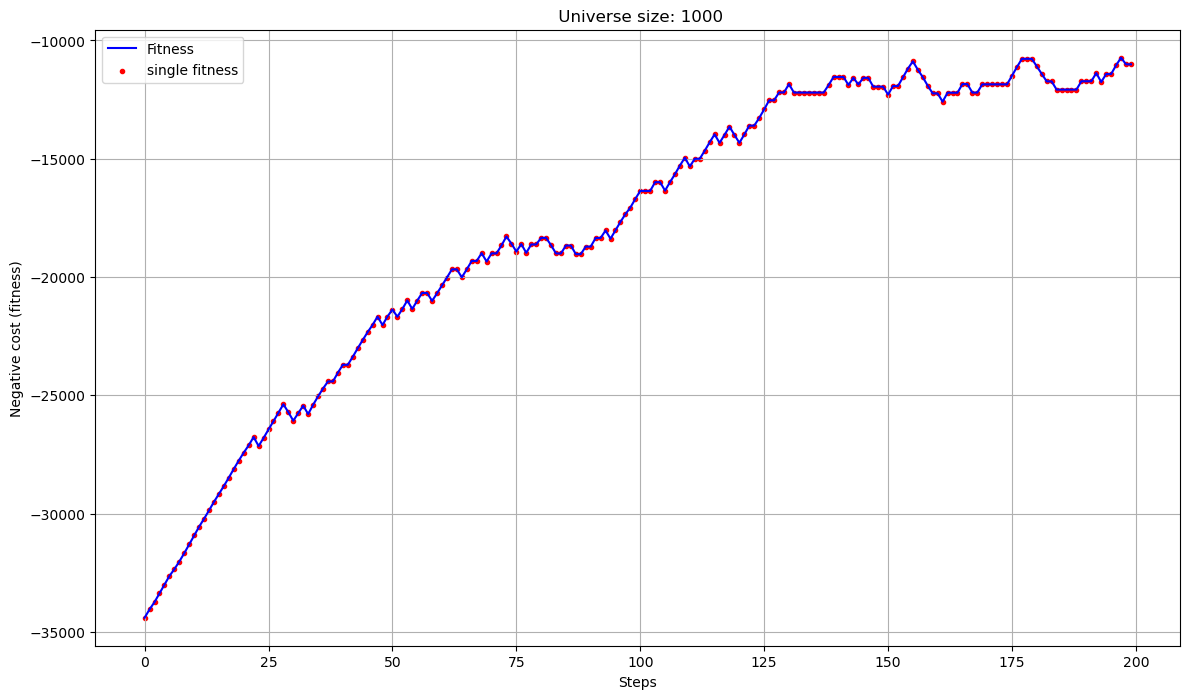

Universe Size: 10000, Num Sets: 1000, Density: 0.2


Simulated Annealing: 100%|██████████| 200/200 [01:53<00:00,  1.77it/s]


[-2292161.920691861, -2287887.3345491993, -2287887.3345491993, -2283638.6154590496, -2279434.542079665, -2275197.576014742, -2275197.576014742, -2270967.6603431087, -2270967.6603431087, -2266615.387894888, -2262354.9128231453, -2258019.12990226, -2258019.12990226, -2253777.4629824385, -2253777.4629824385, -2249486.4085705723, -2245275.28872163, -2240866.4377262285, -2240866.4377262285, -2236636.522054596, -2236636.522054596, -2236636.522054596, -2232460.623803378, -2232460.623803378, -2228084.785036337, -2228084.785036337, -2228084.785036337, -2223908.88678512, -2219627.243517754, -2219627.243517754, -2219627.243517754, -2219627.243517754, -2219627.243517754, -2215347.95274287, -2215347.95274287, -2210983.898581382, -2210983.898581382, -2210983.898581382, -2210983.898581382, -2210983.898581382, -2210983.898581382, -2210983.898581382, -2206664.599488723, -2206664.599488723, -2206664.599488723, -2202291.1178738684, -2197978.8815299915, -2193835.8324258793, -2193835.8324258793, -2189450.5

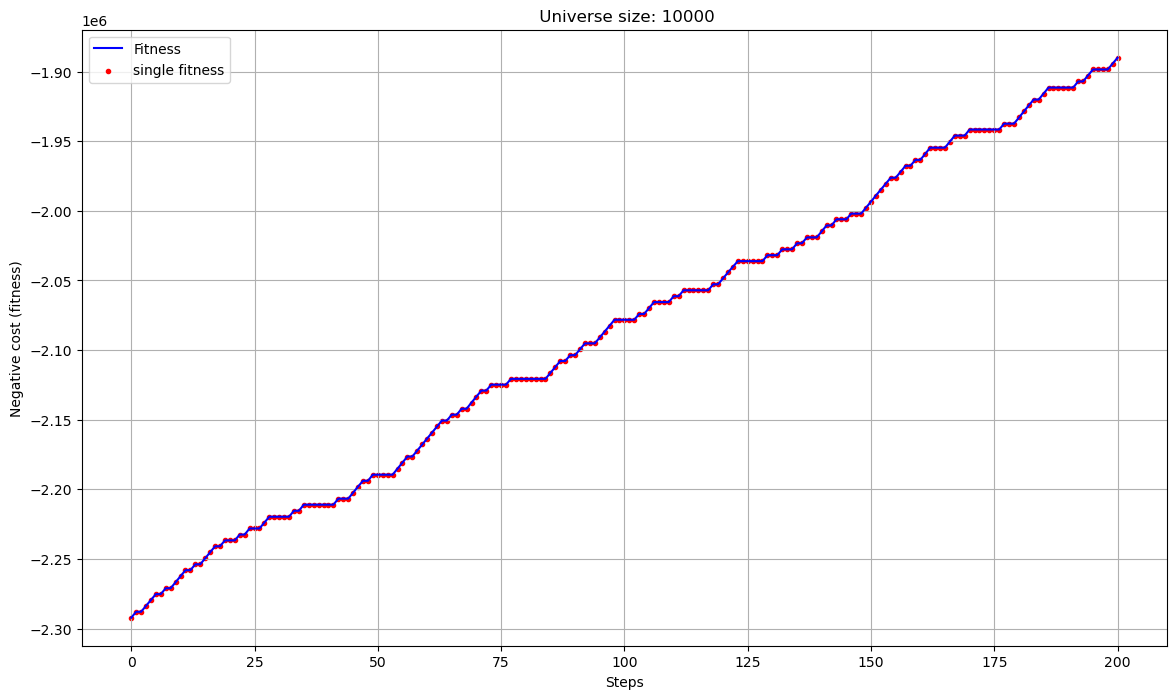

Universe Size: 100000, Num Sets: 10000, Density: 0.1


In [40]:
for universe, num_set, density in zip(universes, num_sets, densities):
    print(f"Universe Size: {universe}, Num Sets: {num_set}, Density: {density}")
    
    rng = np.random.Generator(np.random.PCG64([universe, num_set, int(10_000 * density)]))
    
    SETS = rng.random((num_set, universe)) < density

    
    for s in range(universe):
        if not np.any(SETS[:, s]):
            SETS[np.random.randint(num_set), s] = True

    #for each set a cost proportional to the number of element covered is associated to it
    COSTS = np.power(SETS.sum(axis=1), 1.1)
    
    sol_val, sol_cost, hist = simulated_annealing(SETS, COSTS, num_set, density, rng)
    
    print(f"Best cost for: {universe}: {sol_cost}")
    print(f"Best validity solution: {sol_val}")

    plt.figure(figsize=(14, 8))
    plt.plot(range(len(hist)), hist, color="blue", label="Fitness")
    plt.scatter(range(len(hist)), hist, color="red", marker=".", label="single fitness")
    plt.title(f" Universe size: {universe}")
    plt.xlabel("Steps")
    plt.ylabel("Negative cost (fitness)")
    plt.legend()
    plt.grid(True)
    plt.show()
    